# Test using the Alpha Vantage Quote <a name="top"></a>
## Table of Contents
[Setup](#setup)<br>
[Intraday Data](#intraday)<br>
[Daily and Longer Data](#daily)<br>
[Quote](#quote)<br>

## Setup<a name="setup"></a>
 [top](#top)<br>
 Preliminary set-up as well for both csv and json download

In [1]:
api_key = 'RF20IXY356J04AWD'

In [94]:
import datetime as dt
import json
import os
import time
import urllib.request
from pprint import pprint
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
import numpy as np
import pandas as pd
%matplotlib inline

The parameter data for qutoes.
Apple: AAPL
DJIA: .DJI
SPX: .SPX

Marks & Spencer: MKS.L
Canadian Tire: CTC-A.TO


In [95]:
    api_key = 'RF20IXY356J04AWD'
    
    def get_intraday_prices(ticker, interval='1min', outputsize='full'):
        x_col_head = 'Time Series (' + interval + ')'
        url = ('https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY'
               + '&symbol=' + ticker
               + '&interval=' + interval
               + '&outputsize=' + outputsize
               + '&apikey=' + api_key)
        req = urllib.request.urlopen(url)
        x = json.loads(req.read().decode('utf-8'))
        intraday = pd.DataFrame(x[x_col_head],
                                dtype=np.float64).transpose()
        intraday.index = pd.to_datetime(intraday.index, dayfirst=True)
        intraday.columns = ['open', 'high', 'low', 'close', 'volume']
        return intraday

    
    def get_daily_prices(ticker, output='compact'):
        url = ('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED'
               + '&symbol=' + ticker
               + '&outputsize=' + output
               + '&apikey=' + api_key)
        req = urllib.request.urlopen(url)
        x = json.loads(req.read().decode('utf-8'))
        daily = pd.DataFrame(x['Time Series (Daily)'],
                             dtype=np.float64).transpose()
        daily.index = pd.to_datetime(daily.index)
        daily.columns = ['open', 'high', 'low', 'close', 'adjusted close', 'volume',
                         'dividend amount', 'split coeff']
        return daily

    

    class Security(object):
        """ security with historical intraday and daily price data """

        def __init__(self, ticker: str, intraday_prices: pd.DataFrame=None, 
                     daily_prices: pd.DataFrame=None, output: str='compact') -> Security:
            """ Takes in a pandas data frame for the historical prices"""
            self.ticker = ticker
            self.intraday_prices = intraday_prices
            self.daily_prices = daily_prices

        def get_intraday(self):
            return self.intraday_prices

        def get_daily(self):
            return self.daily_prices

In [96]:
ticker = 'AAPL'
tmp_intraday = get_intraday_prices(ticker)
time.sleep(20)
tmp_daily = get_daily_prices(ticker)
aapl = Security(ticker, intraday_prices=tmp_intraday, daily_prices=tmp_daily)

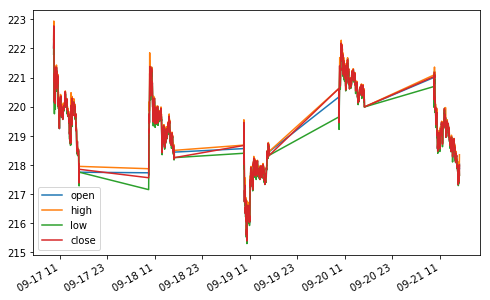

In [102]:
aapl.get_intraday().drop(columns=['volume']).plot(figsize=(8, 5));

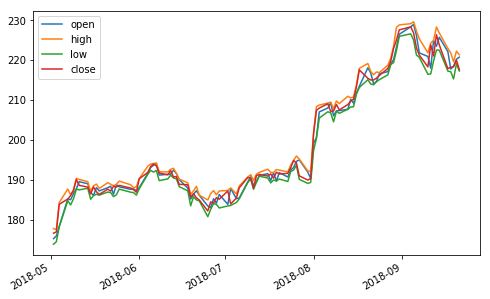

In [104]:
aapl.get_daily()[['open', 'high', 'low', 'close']].plot(figsize=(8, 5));

In [77]:
sym = 'AAPL'
params = {'sym': sym, 'interval': '1min', 'outputsize': 'full', 'output' : 'compact'}

## Intraday Data<a name="intraday"></a>
 [top](#top)<br>
 In this section we'll first read in the csv. After the csv we also have the code for reading in json, but unfortunately pivotting the df is currently working.

In [60]:
x_col_head = 'Time Series (' + params['interval'] + ')'
url = ('https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY'
       + '&symbol=' + params['sym']
       + '&interval=' + params['interval']
       + '&outputsize=' + params['outputsize']
       + '&apikey=' + api_key)
req = urllib.request.urlopen(url)
x = json.loads(req.read().decode('utf-8'))
intraday = pd.DataFrame(x[x_col_head],
                        dtype=np.float64).transpose()
intraday.index = pd.to_datetime(intraday.index, dayfirst=True)
intraday.columns = ['open', 'high', 'low', 'close', 'volume']
intraday.head()

,open,high,low,close,volume
2018-09-21 15:59:00,2928.3201,2930.0500,2928.3201,2929.9299,81286053.0
2018-09-21 15:58:00,2927.5500,2927.6899,2927.2500,2927.5400,33592146.0
2018-09-21 15:57:00,2929.4600,2929.4600,2927.5000,2927.5000,33735045.0
2018-09-21 15:56:00,2930.5400,2930.5400,2930.2500,2930.2500,19536424.0
2018-09-21 15:55:00,2930.6899,2930.6899,2930.0400,2930.4099,25181023.0


## Daily and Longer Data <a name="daily"></a>
[top](#top)<br>

In [78]:
url = ('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED'
       + '&symbol=' + params['sym']
       + '&outputsize=' + params['output']
       + '&apikey=' + api_key)
req = urllib.request.urlopen(url)
x = json.loads(req.read().decode('utf-8'))
daily = pd.DataFrame(x['Time Series (Daily)'],
                     dtype=np.float64).transpose()
daily.index = pd.to_datetime(daily.index)
daily.columns = ['open', 'high', 'low', 'close', 'adjusted close', 'volume', 'dividend amount', 'split coeff']
daily.head()

,open,high,low,close,adjusted close,volume,dividend amount,split coeff
2018-09-21,220.78,221.36,217.29,217.66,217.66,95577567.0,0.0,1.0
2018-09-20,220.24,222.28,219.15,220.03,220.03,26608794.0,0.0,1.0
2018-09-19,218.50,219.62,215.30,218.37,218.37,27123833.0,0.0,1.0
2018-09-18,217.79,221.85,217.12,218.24,218.24,31571712.0,0.0,1.0
2018-09-17,222.15,222.95,217.27,217.88,217.88,37195133.0,0.0,1.0


## Quote <a name="quote"></a>
[top](#top)<br>

In [62]:
url = ('https://www.alphavantage.co/query?function=GLOBAL_QUOTE'
       + '&symbol=' + params['sym']
       + '&apikey=' + api_key)
req = urllib.request.urlopen(url)
x = json.loads(req.read().decode('utf-8'))
pprint(x['Global Quote'])

{'01. symbol': '^GSPC',
 '02. open': '2936.7600',
 '03. high': '2940.9100',
 '04. low': '2927.1100',
 '05. price': '2929.6700',
 '06. volume': '3900791977',
 '07. latest trading day': '2018-09-21',
 '08. previous close': '2930.7500',
 '09. change': '-1.0801',
 '10. change percent': '-0.0369%'}


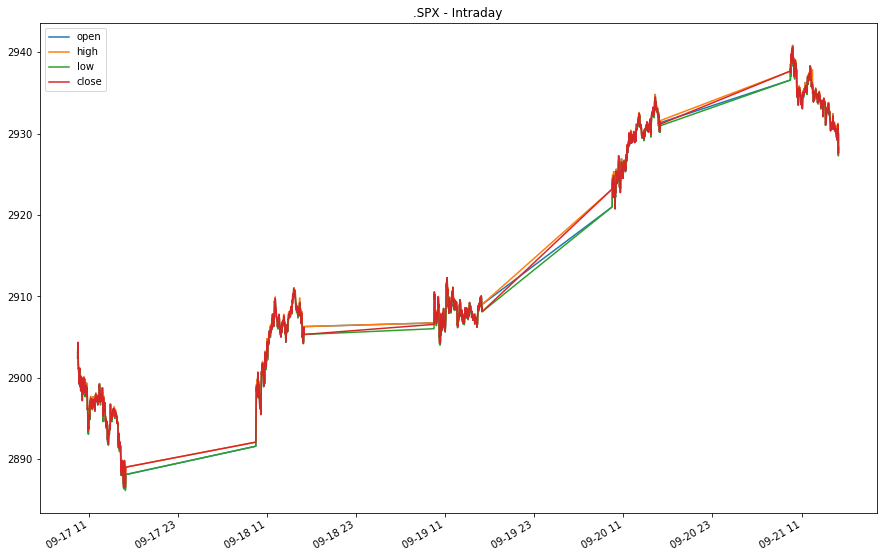

In [70]:
# intraday[['open', 'high', 'low', 'close']].plot(x=intraday.index.astype(str), figsize=(15, 10))
intraday[['open', 'high', 'low', 'close']].plot(figsize=(15, 10))
plt.title(sym + ' - Intraday')
plt.show();

In [66]:
pivoted_d = intraday.pivot_table('close', index=intraday.index.hour, columns=intraday.index.weekday)
pivoted_d

,0,1,2,3,4
9,2900.599983,2898.060347,2907.894663,2923.225627,2939.216990
10,2898.025333,2900.195842,2906.875180,2924.993003,2935.883647
11,2896.670650,2905.681162,2909.326660,2927.584658,2935.300848
12,2897.500342,2907.075322,2908.625345,2929.838337,2935.837340
13,2894.408827,2906.499995,2907.817853,2930.640340,2934.037502
14,2895.214160,2909.127848,2907.922997,2931.208328,2932.616830
15,2889.432672,2907.351342,2908.197332,2932.523150,2930.557673


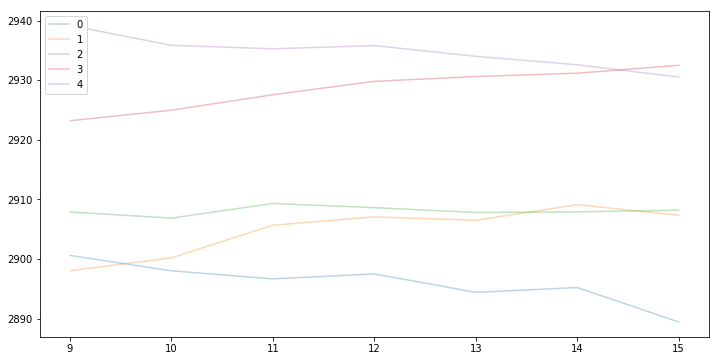

In [68]:
pivoted_d.plot(figsize=(12,6), alpha=0.3)
# plt.title('S&P 500 - Daily Returns Each Week');

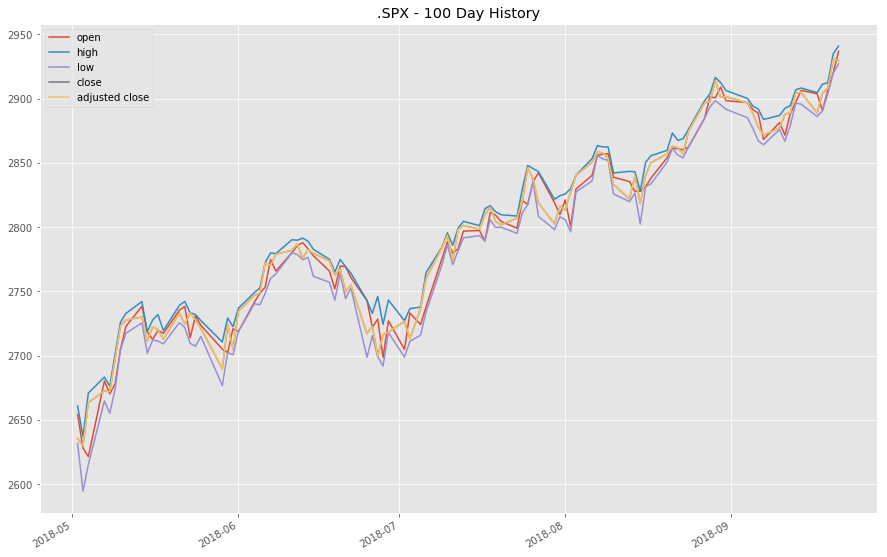

In [97]:
daily[['open', 'high', 'low', 'close', 'adjusted close']].plot(figsize=(15, 10))
plt.title(sym + ' - 100 Day History');